In [2]:
!pip install farasapy
!pip install Tashaphyne==0.3.4.1
!pip install wordcloud
!pip install ar_wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')

     |████████████████████████████████| 244 kB 8.8 MB/s 
     |████████████████████████████████| 126 kB 47.1 MB/s 
     |████████████████████████████████| 366 kB 11.4 MB/s 
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
pip install art

     |████████████████████████████████| 580 kB 9.3 MB/s 


In [5]:
from art import*
art= text2art ("Let 's     Go    !!!")
print(art)

 _            _     _             ____             _  _  _ 
| |      ___ | |_  ( ) ___       / ___|  ___      | || || |
| |     / _ \| __| |/ / __|     | |  _  / _ \     | || || |
| |___ |  __/| |_     \__ \     | |_| || (_) |    |_||_||_|
|_____| \___| \__|    |___/      \____| \___/     (_)(_)(_)
                                                           



In [7]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Gensim
import gensim, spacy, logging
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

import string

import re

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.decomposition import LatentDirichletAllocation


from ar_wordcloud import ArabicWordCloud

In [9]:
from tashaphyne.stemming import ArabicLightStemmer

In [10]:
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

In [11]:
from farasa.pos import FarasaPOSTagger
from farasa.ner import FarasaNamedEntityRecognizer
from farasa.diacratizer import FarasaDiacritizer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer

## Read and exploring the data

In [13]:
df = pd.read_csv('SaudiNews')
df.drop(columns= ['Unnamed: 0'], inplace= True)
df

,source,title,content
0,aleqtisadiya,هيئة المسح الجيولوجي الأمريكية: زلزال بقوة 6.3...,قالت هيئة المسح الجيولوجي الأمريكيةإن زلزالا ...
1,alweeam,توفر وظائف أكاديمية بجامعــة الملك فيصل,أعلنت جامعة الملك فيصل بالأحساء توفر عدد من ا...
2,sabq,&quot;أدبي جدة&quot; يدشن دورة &quot;مفاهيم كت...,سبق- جدة: دشَّن أدبي جدة اللقاء الأول من دورة...
3,alyaum,قتلة الطموح,«في مجتمعنا مبدأ يمنع تطور الفرد فكرياً واجتم...
4,alriyadh,دراسة مسببات عدم انخفاض السلع في المملكة بانخف...,أكد الدكتور سليمان السماحي الرئيس التنفيذي...
...,...,...,...
9995,okaz,تطويق العنف المدرسي ببرنامج «رفق» الإرشادي,تعتزم وزارة التعليم، في مستهل العام الدراسي ا...
9996,aawsat,ولي ولي العهد السعودي يتقبل بيعة منسوبي وزارة...,استقبل الأمير محمد بن سلمان بن عبد العزيز ولي ...
9997,alriyadh,هبوط أول طائرة عسكرية سعودية في مطار عدن بعد د...,هبطت طائرة عسكرية سعودية في مطار مدينة عدن...
9998,alwatan,"استثمار ""الربيعة"" عالميا",هناك دول في العالم تنفق مع شركات علاقات عالمي...


In [16]:
df = pd.read_csv('SaudiNews')
df.drop(columns= ['Unnamed: 0'], inplace= True)
df_sample=df.sample(n = 3000)

In [17]:
df_sample

,source,title,content
8828,3alyoum,تواصل فعاليات مهرجان الورد والفاكهة في تبوك,Next Previous محمد البلوي – عين اليوم\nحظي مه...
4849,sabq,ناطحة سحاب أمريكية تشارك المسلمين فرحتهم بالعيد,سبق- وكالات: أضيء مبنى إمباير ستايت في نيويور...
3487,alriyadh,هل تفسح لشيخ من نينوى,سبق وكتبت مقالا بعنوان الظواهر الخارقة في ...
1120,alyaum,الطيران المدني: نمو حركة الركاب في المطارات ال...,أكد رئيس الهيئة العامة للطيران المدني، سليمان...
1368,aljazirah,صعقة,خرج بعد أن أوصد باب شقته بكل قوة ، والغضب يشع ...
...,...,...,...
5170,3alyoum,شاهد.. أهالي مكة يحتفلون بـ”سلمان الحزم”,Next Previous عين اليوم – مكة المكرمة\n شرف خ...
2584,almadina,فورين بوليسي: تمدد داعش وأكراد سوريا يجبر أنق...,وصف دان دي لوس محرر شؤون الأمن الوطني في مجلة...
9903,aawsat,كشف صفقة أوباما السرية مع إيران,كان الرئيس باراك أوباما قد وعد ألا يبني صفقته ...
5567,okaz,أول أغنية خليجية مشتركة,يشارك الفنانون محمد عبده وراشد الماجد وحسين ا...


In [18]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 8828 to 2696
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   source   3000 non-null   object
 1   title    2995 non-null   object
 2   content  2992 non-null   object
dtypes: object(3)
memory usage: 93.8+ KB


In [19]:
df_sample.duplicated().sum()

11

In [20]:
df_sample.drop_duplicates(inplace = True)

## NLP Preprocessing

In [21]:
max(df_sample.content.str.len())

26852.0

In [22]:
min(df_sample.content.str.len())

1.0

**removing observtions less than 120**

In [23]:
df_sample = df_sample[df_sample.content.str.len() > 120]

In [24]:
df_sample.shape

(2935, 3)

In [25]:
df_sample.content.isna().sum()

0

### **Removing Non-arabic letters, numbers, amiss typo and special characters**


In [26]:
# function to clean and normalize text 
def clean_text(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']  
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
        
    text = text.strip()
    
    return text

In [27]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    
    return text


def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text


def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [28]:
# clean and normalize text
df_sample['content'] = df_sample.content.apply(lambda x: clean_text(x))

# remove punctuation
df_sample['content'] = df_sample.content.apply(lambda x: remove_punctuations(x))

# remove diacritics
df_sample['content'] = df_sample.content.apply(lambda x: remove_diacritics(x))

# remove repeating char
df_sample['content'] = df_sample.content.apply(lambda x: remove_repeating_char(x))

# remove english letters
df_sample.content = df_sample.content.apply(lambda x: re.sub(r'[a-zA-Z]', '', x))

# remove a special character _
df_sample.content = df_sample.content.apply(lambda x: re.sub(r'[_]+', '', x))

# remove space
df_sample['content'] = df_sample.content.str.replace('\d+', '')

In [29]:
df_sample

,source,title,content
8828,3alyoum,تواصل فعاليات مهرجان الورد والفاكهة في تبوك,محمد البلوي عين اليوم حظي مهرجان الورد والفا...
4849,sabq,ناطحة سحاب أمريكية تشارك المسلمين فرحتهم بالعيد,سبق وكالات اضيء مبني امباير ستايت في نيويورك ي...
3487,alriyadh,هل تفسح لشيخ من نينوى,سبق وكتبت مقالا بعنوان الظواهر الخارقه في التر...
1120,alyaum,الطيران المدني: نمو حركة الركاب في المطارات ال...,اكد رئيس الهيئه العامه لطيران المدني سليمان بن...
1368,aljazirah,صعقة,خرج بعد ان اوصد باب شقته بكل قوه والغضب يشع من...
...,...,...,...
5170,3alyoum,شاهد.. أهالي مكة يحتفلون بـ”سلمان الحزم”,عين اليوم مكه المكرمه شرف خادم الحرمين الشري...
2584,almadina,فورين بوليسي: تمدد داعش وأكراد سوريا يجبر أنق...,وصف دان دي لوس محر شؤون الامن الوطني في مجله ف...
9903,aawsat,كشف صفقة أوباما السرية مع إيران,كان الرئيس باراك اوباما قد وعد الا يبني صفقته ...
5567,okaz,أول أغنية خليجية مشتركة,يشارك الفنانون محمد عبده وراشد الماجد وحسين ال...


In [43]:
# Convert to list
data = df_sample[df_sample.columns[2]].values.tolist()

### **Stemming**

In [44]:
#farasa_st = FarasaStemmer()

In [45]:
#from nltk.tokenize import word_tokenize

In [46]:
#from nltk.stem.isri import ISRIStemmer

In [30]:
# st = ISRIStemmer()
# word_list = str(df_sample.content) # convert to string
# wordsfilter=[]
# # Define a function
# def filter(word_list):
    
#     for a in word_tokenize(word_list):
#         stem = st.stem(a)
#         wordsfilter.append(stem)
#     return wordsfilter

# # Call the function
# filter(word_list)

In [31]:
# the document-term matrix 
arb_stopwords = set(nltk.corpus.stopwords.words('arabic'))
tfidf = TfidfVectorizer(stop_words=arb_stopwords)
doc_words = tfidf.fit_transform(df_sample.content)
pd.DataFrame(doc_words.toarray(),columns=tfidf.get_feature_names())

,اؤدي,اؤكد,اؤلئك,اؤمن,اؤيدها,ائتلاف,ائتلافا,ائتلافيه,ائتمان,ائتمانيه,ائتمنهم,ائذن,ائمه,اب,ابا,اباء,اباءهم,اباؤكن,اباؤهم,ابائه,ابائهم,ابابا,اباتو,اباحه,اباحي,اباد,اباده,ابار,ابارا,اباغسطس,ابالغ,ابان,ابانات,ابانت,اباه,ابتدا,ابتداء,ابتدائي,ابتدائيا,ابتدائيه,...,ﺍﻟﻤﺠﺰﺭﺓ,ﺍﻟﻤﻘﺎﻭﻣﺔ,ﺍﻟﻤﻠﻌﻮﻧﺔ,ﺍﻟﻤﻮﺍﻟﻴﻦ,ﺍﻟﻴﻤﻨﻴﻦ,ﺍﻷﻓﺮﺍﺩ,ﺑﻌﺪ,ﺑﻤثل,ﺑﻤستوي,ﺗﺴﺘﻤﺮ,ﺗﻨﺘﻬﻲ,ﺗﻮﻏﻞ,ﺟﻮﻟﺔ,ﺩﺍﺭ,ﺩﻟﻴﻞ,ﻋﻠﻰ,ﻋﻴد,ﻓﻲ,ﻗﺎﻝ,ﻗﻴﺎﺩﺍﺕ,ﻛﺒﻴﺮﺓ,ﻛﺜﻴﺮ,ﻟﺘﺤﺼﺪ,ﻟﻠﺮﺋﻴﺲ,ﻣﺪﺭﻋﺎﺕ,ﻣﺮ,ﻣﺴﺆﻭﻝ,ﻣﺼﺪﺭ,ﻣﻌﻬﻢ,ﻣﻦ,ﻭسوف,ﻭواضح,ﻭﺍﻹﺳﻼﻣﻲ,ﻭﺣﺸﻴﺔ,ﻭﺩﻟﻴﻞ,ﻭﻣﺴﻤﻊ,ﻭﻣﻦ,ﻭﻫﻤﺠﻴﺔ,ﻷداء,ﻷنظمه
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# To display full text
pd.set_option('display.max_colwidth',-1)#can see the whole data on one single row
# complaints_df
df_sample

source  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## EDA

downloading and unzipping arabic font: /usr/local/lib/python3.7/dist-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.7/dist-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /usr/local/lib/python3.7/dist-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


(-0.5, 399.5, 199.5, -0.5)

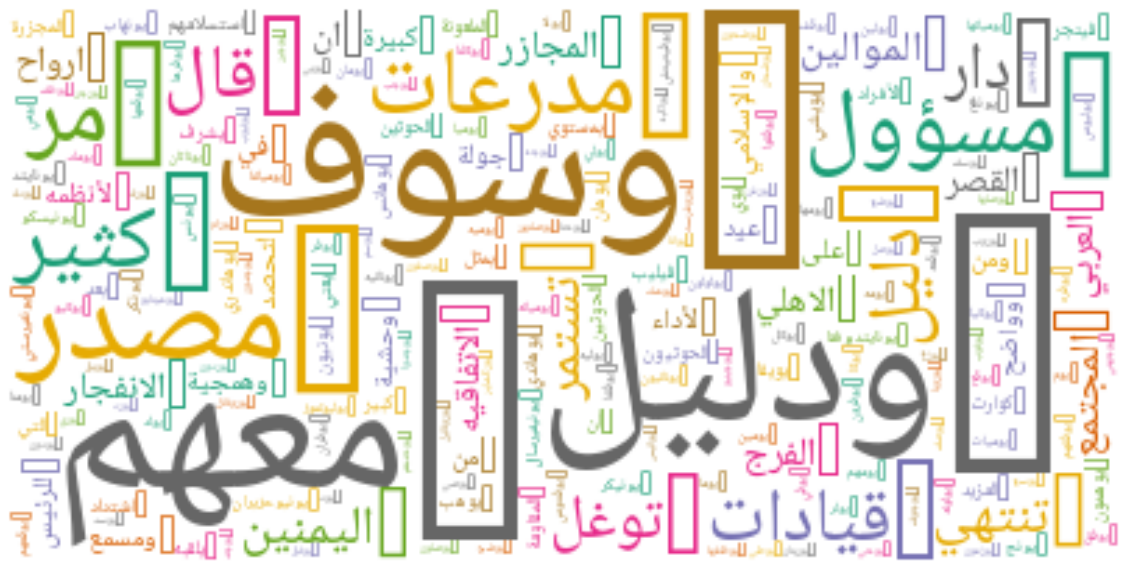

In [33]:
# print WordCloud visualization

awc = ArabicWordCloud(background_color="white",)

mpl.rcParams['figure.figsize']=(20,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 

# wordcloud = awc.generate(str(tfidf.get_feature_names())).from_text(
#     str(tfidf.get_feature_names()))

wordcloud = awc.generate(str(tfidf.get_feature_names())).from_text(str(tfidf.get_feature_names()))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud.recolor(colormap='Dark2'),interpolation='bilinear')
#plt.title("Word Cloud of all the words")
plt.axis('off')

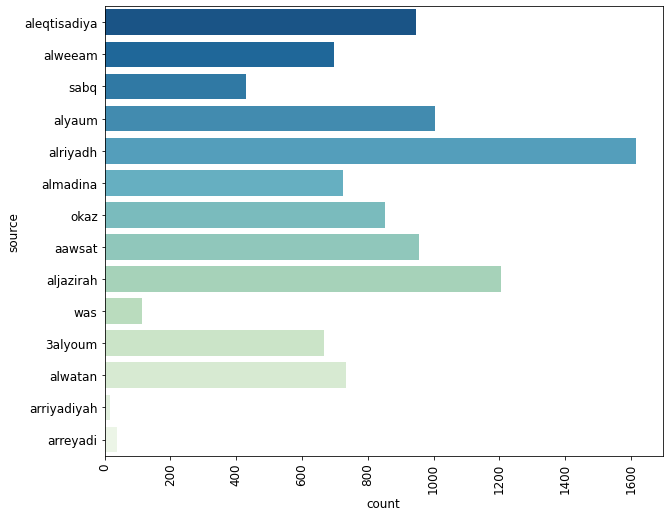

In [34]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.countplot(y="source", data=df, palette='GnBu_r');

source Distribution

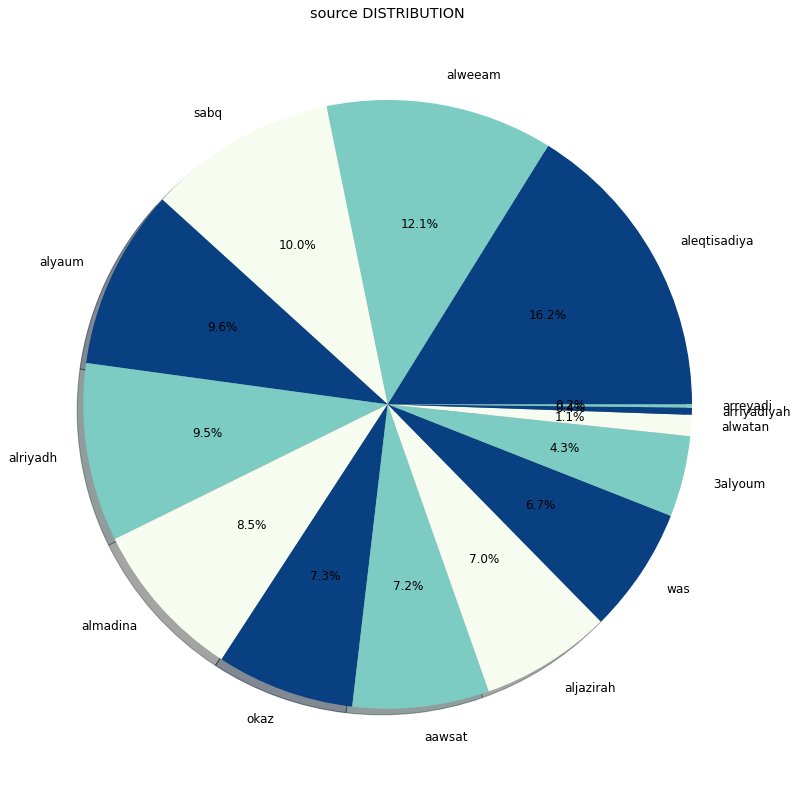

In [35]:
targetCounts = df['source'].value_counts()
targetLabels  = df['source'].unique()
# Make square figures and axes
plt.figure(1, figsize=(30,30))
the_grid = GridSpec(2, 2)

#Blues_r #PuBuGn #Sequential
cmap = plt.get_cmap('GnBu_r')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='source DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)

#Topic Modeling**


1. NMF

In [36]:
# function to display topics with words
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
#         else:
#             print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    

def display_top(model, feature_names, no_top_words, topic_names=None):
    
    my_dict = {'topic_0':'','topic_1':'','topic_2':'','topic_3':'','topic_4':''}
    ctr = 0
    for ix, topic in enumerate(model.components_):
                #if not topic_names or not topic_names[ix]:
#             print("\nTopic ", ix)
        txt = ",".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        my_dict['topic_'+str(ctr)] = txt
        ctr+=1
#         print('words are::: ',txt)
    return my_dict

In [37]:
topic_nums = list(np.arange(3, 10, 1))

#nmf_models = []
for num in topic_nums:
    nmf = NMF(num)
    #nmf_models.append(nmf)
    nmf.fit_transform(doc_words)
    display_topics(nmf, tfidf.get_feature_names(), 50)
    print("------------------------------------------")


Topic  0
ان, علي, الي, او, انه, خلال, ايران, وقال, العمل, العام, داعش, اي, حتي, النفط, المتحده, اكثر, اله, كانت, عام, الا, اليوم, تم, المائه, وان, وفي, وزاره, الماضي, بشكل, عد, انها, السعوديه, الاتفاق, المنطقه, يمكن, الحكومه, امس, الرئيس, قال, واضاف, مدينه, بان, فان, اسعار, الملكه, العالم, يكون, مليون, اخري, عدن, ايضا

Topic  1
بن, عبدالعزيز, ولي, الامير, محمد, سلمان, السمو, الملكي, وزير, اله, الحرمين, الملك, الشريفين, مجلس, العهد, خادم, الوزراء, صاحب, الملكه, رئيس, العربيه, عسير, سعود, عبداله, الدكتور, علي, الدفاع, منطقه, ال, امير, خالد, سموه, فيصل, العامه, السعوديه, الهيئه, نائب, نايف, معالي, لرئيس, النائب, الاستقبال, الامن, البلدين, مدير, الثاني, الداخليه, امس, خلال, المنطقه

Topic  2
الفريق, النادي, الاتحاد, القدم, علي, الاعبين, الموسم, الاعب, لكره, نادي, ان, المقبل, السعودي, فريق, المدرب, المباراه, الاول, لاعب, الهلال, الي, الفني, الاهلي, اداره, النصر, المعسكر, كاس, الدوري, امام, الوديه, المنتخب, السوبر, مباراه, التدريبات, ملعب, الاداره, خلال, كره, الشباب, مباريات, الملعب, مدرب, 

In [38]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(doc_words)

In [39]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5"],
             columns = tfidf.get_feature_names())
topic_word

,اؤدي,اؤكد,اؤلئك,اؤمن,اؤيدها,ائتلاف,ائتلافا,ائتلافيه,ائتمان,ائتمانيه,ائتمنهم,ائذن,ائمه,اب,ابا,اباء,اباءهم,اباؤكن,اباؤهم,ابائه,ابائهم,ابابا,اباتو,اباحه,اباحي,اباد,اباده,ابار,ابارا,اباغسطس,ابالغ,ابان,ابانات,ابانت,اباه,ابتدا,ابتداء,ابتدائي,ابتدائيا,ابتدائيه,...,ﺍﻟﻤﺠﺰﺭﺓ,ﺍﻟﻤﻘﺎﻭﻣﺔ,ﺍﻟﻤﻠﻌﻮﻧﺔ,ﺍﻟﻤﻮﺍﻟﻴﻦ,ﺍﻟﻴﻤﻨﻴﻦ,ﺍﻷﻓﺮﺍﺩ,ﺑﻌﺪ,ﺑﻤثل,ﺑﻤستوي,ﺗﺴﺘﻤﺮ,ﺗﻨﺘﻬﻲ,ﺗﻮﻏﻞ,ﺟﻮﻟﺔ,ﺩﺍﺭ,ﺩﻟﻴﻞ,ﻋﻠﻰ,ﻋﻴد,ﻓﻲ,ﻗﺎﻝ,ﻗﻴﺎﺩﺍﺕ,ﻛﺒﻴﺮﺓ,ﻛﺜﻴﺮ,ﻟﺘﺤﺼﺪ,ﻟﻠﺮﺋﻴﺲ,ﻣﺪﺭﻋﺎﺕ,ﻣﺮ,ﻣﺴﺆﻭﻝ,ﻣﺼﺪﺭ,ﻣﻌﻬﻢ,ﻣﻦ,ﻭسوف,ﻭواضح,ﻭﺍﻹﺳﻼﻣﻲ,ﻭﺣﺸﻴﺔ,ﻭﺩﻟﻴﻞ,ﻭﻣﺴﻤﻊ,ﻭﻣﻦ,ﻭﻫﻤﺠﻴﺔ,ﻷداء,ﻷنظمه
component_1,0.001,0.001,0.000,0.0,0.001,0.003,0.000,0.000,0.0,0.000,0.001,0.001,0.003,0.016,0.005,0.006,0.002,0.000,0.0,0.000,0.003,0.000,0.000,0.001,0.001,0.003,0.001,0.002,0.000,0.001,0.003,0.010,0.003,0.001,0.002,0.000,0.021,0.003,0.001,0.001,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001
component_2,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.001,0.000,0.000,0.001,0.000,0.005,0.000,0.000,0.000,0.0,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.001,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_3,0.000,0.002,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.012,0.004,0.000,0.000,0.001,0.0,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.005,0.000,0.002,0.000,0.000,0.000,0.002,0.001,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.002,0.000,0.0,0.000,0.006,0.004,0.008,0.0,0.000,0.000,0.000,0.000,0.020,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.003,0.000,0.000,0.000,0.007,0.003,0.000,0.000,0.003,0.000,0.004,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,...,0.002,0.003,0.002,0.003,0.002,0.003,0.003,0.0,0.000,0.002,0.002,0.003,0.003,0.002,0.002,0.002,0.002,0.006,0.003,0.002,0.002,0.002,0.002,0.003,0.003,0.002,0.003,0.003,0.002,0.004,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.000,0.000
component_5,0.000,0.002,0.003,0.0,0.000,0.001,0.000,0.000,0.0,0.001,0.000,0.000,0.000,0.011,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.002,0.005,0.001,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [40]:
display_topics(nmf_model, tfidf.get_feature_names(), 50)



Topic  0
ان, علي, الي, او, العمل, اله, انه, خلال, تم, حتي, وزاره, الا, التعليم, وان, اي, العامه, عد, الوزاره, يكون, الملكه, عام, كانت, اكثر, المجتمع, احد, العام, وفي, بان, البلديه, الوطن, عبر, الصحيه, بشكل, يمكن, الامر, عمل, الشباب, الجنه, وقد, مدير, انها, منطقه, عليها, تكون, وذلك, يتم, الرياض, الدكتور, الاعمال, السعوديه

Topic  1
بن, عبدالعزيز, ولي, الامير, سلمان, السمو, محمد, الملكي, وزير, الحرمين, الشريفين, مجلس, العهد, اله, الملك, خادم, الوزراء, صاحب, العربيه, رئيس, الملكه, سعود, عبداله, الدفاع, الدكتور, امير, ال, عسير, سموه, فيصل, خالد, منطقه, نايف, معالي, نائب, السعوديه, الاستقبال, الثاني, النائب, الهيئه, لرئيس, البلدين, علي, العامه, امس, وصاحب, الخارجيه, الداخليه, الامن, العلاقات

Topic  2
الفريق, النادي, الاتحاد, القدم, علي, الاعبين, الموسم, الاعب, لكره, نادي, ان, المقبل, السعودي, فريق, المدرب, المباراه, لاعب, الاول, الي, الهلال, الفني, الاهلي, النصر, المعسكر, كاس, الدوري, اداره, امام, الوديه, المنتخب, السوبر, مباراه, التدريبات, ملعب, مباريات, الاداره, كره, الملعب, مدرب, لموسم

2. LDA

In [ ]:
# Define Search Param
search_params = {'n_components': [10, 9, 8, 7, 6, 5, 4, 3], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(doc_words)

In [ ]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(doc_words)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(10).style.applymap(color_green).applymap(make_bold)
df_document_topics

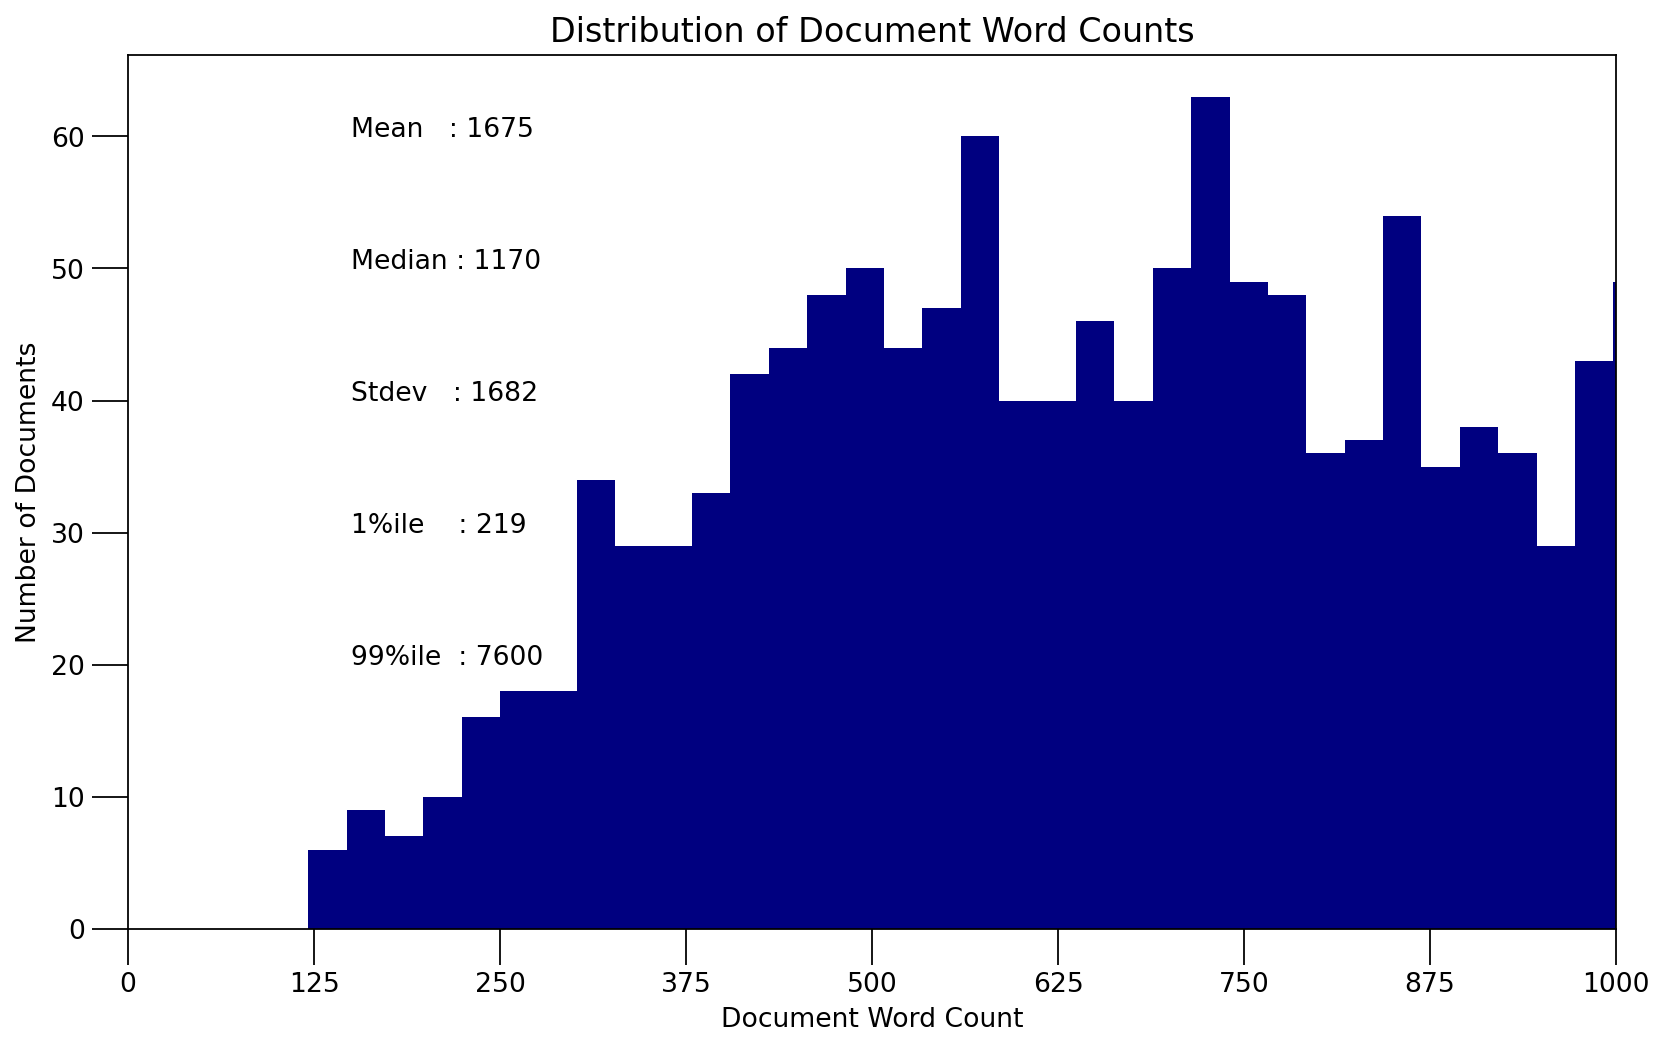

In [54]:
doc_lens = [len(d) for d in df_sample.content]

# Plot
plt.figure(figsize=(12,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(150, 60, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(150,  50, "Median : " + str(round(np.median(doc_lens))))
plt.text(150,  40, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(150,  30, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(150,  20, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=15))
plt.show()

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

In [74]:
#import seaborn as sns
#import matplotlib.colors as mcolors
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

#fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

#for i, ax in enumerate(axes.flatten()):    
 #   df_dominant_topic_sub = df_sample.loc[df_sample.content == i, :]
  #  doc_lens = [len(d) for d in df_dominant_topic_sub.content]
   # ax.hist(doc_lens, bins = 1000, color=cols[i])
    #ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    #sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    #ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    #ax.set_ylabel('Number of Documents', color=cols[i])
    #ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

#fig.tight_layout()
#fig.subplots_adjust(top=0.90)
#plt.xticks(np.linspace(0,1000,9))
#fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
#plt.show()

In [73]:
#from sklearn.cluster import KMeans

#km = KMeans(n_clusters=3, random_state=0)
#km.fit_transform(df_sample)
#cluster_labels = km.labels_
#cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
#pd.concat([corpus_df, cluster_labels], axis=1)